In [205]:
import pandas as pd
import numpy as np
df = pd.read_csv('model_data.csv').drop(columns = ['Unnamed: 0'])

# Data Prepration, removed distance

In [206]:
df = df[['prev_CW/SA_rate', 'S_create2SA_Create', 'S_Create2Start_Time',
       'SA_Create2Start_Time', 'U_create2now', 'U_approve2now', 'type_d',
       'segmentName_d', 'net_pay', 'target']]

In [207]:
df.dropna(inplace = True) # If True, do operation inplace and return None.

In [208]:
df['target'].value_counts()

0    163317
1      4370
Name: target, dtype: int64

In [209]:
# make a dataset that num of tar = num of non tar
import random
df_tar = df[df['target']==1].reset_index(drop = True)
df_nontar = df[df['target']==0].reset_index(drop = True)

number_of_tar = df_tar.shape[0]
random_indices = random.sample(range(len(df_nontar)), int(number_of_tar))
df_nontar = df_nontar[df_nontar.index.isin(random_indices)]

# concat
df = pd.concat([df_tar, df_nontar])

In [210]:
# standardlize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('target',axis=1))
scaled_features = scaler.transform(df.drop('target',axis=1))

In [211]:
# train test
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30)

# KNN 1

In [212]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model instance with n_neighbors = 
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit this KNN model to the training data.
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [213]:
# Use the predict method to predict values KNN model and X_test.
pred = knn.predict(X_test)

# Create a confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[785 567]
 [501 769]]


              precision    recall  f1-score   support

           0       0.61      0.58      0.60      1352
           1       0.58      0.61      0.59      1270

    accuracy                           0.59      2622
   macro avg       0.59      0.59      0.59      2622
weighted avg       0.59      0.59      0.59      2622



Text(0, 0.5, 'Error Rate')

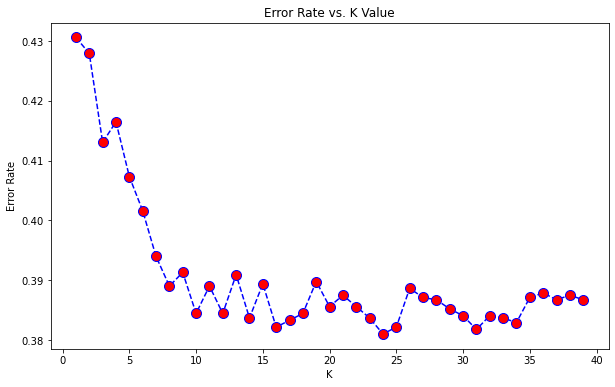

In [214]:
import matplotlib.pyplot as plt

# choose K, elbow method
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [215]:
elbow_neighbors = pd.DataFrame(list(zip(error_rate, 
                      range(1,40))), columns = ['error rate', 
                                                'n']).sort_values(by = 'error rate').reset_index()['n'][0]
print('use k = {}'.format(elbow_neighbors))

use k = 24


In [216]:
knn = KNeighborsClassifier(n_neighbors = elbow_neighbors)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = {}'.format(elbow_neighbors))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K = 24


[[910 442]
 [557 713]]


              precision    recall  f1-score   support

           0       0.62      0.67      0.65      1352
           1       0.62      0.56      0.59      1270

    accuracy                           0.62      2622
   macro avg       0.62      0.62      0.62      2622
weighted avg       0.62      0.62      0.62      2622



# KNN 2, pick significant value from LR

In [218]:
X = df[['prev_CW/SA_rate', 'type_d', 'segmentName_d', 'net_pay', 'prev_CW/SA_rate']]
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [219]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model instance with n_neighbors = 
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit this KNN model to the training data.
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [220]:
# Use the predict method to predict values KNN model and X_test.
pred = knn.predict(X_test)

# Create a confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[817 453]
 [541 811]]


              precision    recall  f1-score   support

           0       0.60      0.64      0.62      1270
           1       0.64      0.60      0.62      1352

    accuracy                           0.62      2622
   macro avg       0.62      0.62      0.62      2622
weighted avg       0.62      0.62      0.62      2622



Text(0, 0.5, 'Error Rate')

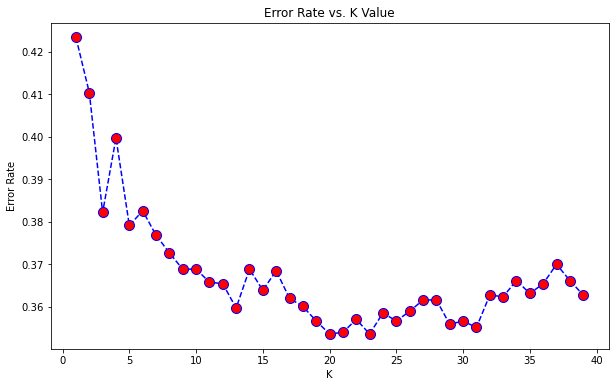

In [221]:
# choose K, elbow method
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [222]:
elbow_neighbors = pd.DataFrame(list(zip(error_rate, 
                      range(1,40))), columns = ['error rate', 
                                                'n']).sort_values(by = 'error rate').reset_index()['n'][0]
print('use k = {}'.format(elbow_neighbors))

use k = 20


In [223]:
knn = KNeighborsClassifier(n_neighbors = elbow_neighbors)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = {}'.format(elbow_neighbors))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K = 20


[[886 384]
 [543 809]]


              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1270
           1       0.68      0.60      0.64      1352

    accuracy                           0.65      2622
   macro avg       0.65      0.65      0.65      2622
weighted avg       0.65      0.65      0.65      2622

